# Example for training / loading the GCE NN

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import sys
sys.path.append('/home/flo/PycharmProjects/GCE/DeepSphere')
from GCE_NN import GCE_NN

Specify whether on a supercomputer / GPU environment or only testing (e.g. on the laptop):
this allows for defining two different paths in the parameter files.

In [12]:
HPC = False
TASK = "TRAIN"  # "TEST" or "TRAIN"

Define the NN type: CNN, CNN_pre, or U-Net (experimental, work in progress)

In [13]:
NN_type = "CNN"

## Parse parameters
If loading an already trained NN: provide the path to the checkpoint folder, otherwise set to None.

In [14]:
path_to_load = None
nn = GCE_NN(NN_type, HPC=HPC, path_to_load=path_to_load)

3FGL SOURCES WILL NOT BE MASKED!


## Build input pipeline

In [15]:
nn.build_input_pipeline(TASK=TASK, DEBUG=False)

## Build neural network

In [16]:
nn.build_model()

NN architecture
  input: M_0 = 16384
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 16384 * 32 / 4 = 131072
    weights: F_0 * F_1 * K_1 = 1 * 32 * 5 = 160
    biases: F_1 = 32
    batch normalization
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 4096 * 64 / 4 = 65536
    weights: F_1 * F_2 * K_2 = 32 * 64 * 5 = 10240
    biases: F_2 = 64
    batch normalization
  layer 3: cgconv3
    representation: M_2 * F_3 / p_3 = 1024 * 128 / 4 = 32768
    weights: F_2 * F_3 * K_3 = 64 * 128 * 5 = 40960
    biases: F_3 = 128
    batch normalization
  layer 4: cgconv4
    representation: M_3 * F_4 / p_4 = 256 * 256 / 4 = 16384
    weights: F_3 * F_4 * K_4 = 128 * 256 * 5 = 163840
    biases: F_4 = 256
    batch normalization
  layer 5: cgconv5
    representation: M_4 * F_5 / p_5 = 64 * 256 / 4 = 4096
    weights: F_4 * F_5 * K_5 = 256 * 256 * 5 = 327680
    biases: F_5 = 256
    batch normalization
  layer 6: cgconv6
    representation: M_5 * F_6 / p_6 = 16 * 256 / 4 = 1024
   

## Train neural network



===== STARTING NN TRAINING =====
Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.
step (50 / 25000):
  learning_rate = 4.94e-04, training loss = 1.82e-02
  validation loss: 2.13e-01
  CPU time: 412s, wall time: 75s
   
Checkpoint 50 saved.
step (100 / 25000):
  learning_rate = 4.88e-04, training loss = 5.41e-03
  validation loss: 1.00e-01
  CPU time: 829s, wall time: 150s
   
Checkpoint 100 saved.
step (150 / 25000):
  learning_rate = 4.82e-04, training loss = 8.06e-03
  validation loss: 5.08e-03
  CPU time: 1239s, wall time: 224s
   
Checkpoint 150 saved.
step (200 / 25000):
  learning_rate = 4.76e-04, training loss = 5.74e-03
  validation loss: 3.40e-03
  CPU time: 1645s, wall time: 298s
   
Checkpoint 200 saved.
step (250 / 25000):
  learning_rate = 4.70e-04, training loss = 3.43e-03
  validation loss: 3.20e-03
  CPU time: 2049s, wall time: 365s
   
Checkpoint 250 saved.
step (300 / 25000):
  learning_rate = 4.64e-04, training loss = 2.90e-03

Checkpoint 2300 saved.
step (2350 / 25000):
  learning_rate = 2.78e-04, training loss = 2.44e-03
  validation loss: 1.96e-03
  CPU time: 18724s, wall time: 3026s
   
Checkpoint 2350 saved.
step (2400 / 25000):
  learning_rate = 2.74e-04, training loss = 1.31e-03
  validation loss: 1.78e-03
  CPU time: 19115s, wall time: 3088s
   
Checkpoint 2400 saved.
step (2450 / 25000):
  learning_rate = 2.71e-04, training loss = 1.30e-03
  validation loss: 2.26e-03
  CPU time: 19507s, wall time: 3150s
   
Checkpoint 2450 saved.
step (2500 / 25000):
  learning_rate = 2.68e-04, training loss = 3.76e-03
  validation loss: 7.76e-03
  CPU time: 19899s, wall time: 3212s
   
Checkpoint 2500 saved.
step (2550 / 25000):
  learning_rate = 2.64e-04, training loss = 1.27e-03
  validation loss: 1.46e-03
  CPU time: 20290s, wall time: 3275s
   
Checkpoint 2550 saved.
step (2600 / 25000):
  learning_rate = 2.61e-04, training loss = 3.43e-03
  validation loss: 2.55e-03
  CPU time: 20682s, wall time: 3337s
   
Chec

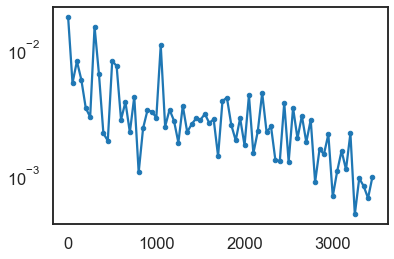

In [17]:
if TASK == "TRAIN":
    nn.train()

Note: in this pre-filled Jupyter notebook, the training was aborted after >~ 3000 batch iterations - keep training to further improve the accuracy (on a computer with a GPU if you have access to one).

## Analyse

/home/flo/PycharmProjects/GCE/DeepSphere/deepsphere/../checkpoints/GCE_poisson_only_onthefly
INFO:tensorflow:Restoring parameters from /home/flo/PycharmProjects/GCE/DeepSphere/deepsphere/../checkpoints/GCE_poisson_only_onthefly/model-3450


/home/flo/PycharmProjects/GCE/DeepSpherePublic/gce_utils.py:887: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \mathrm command


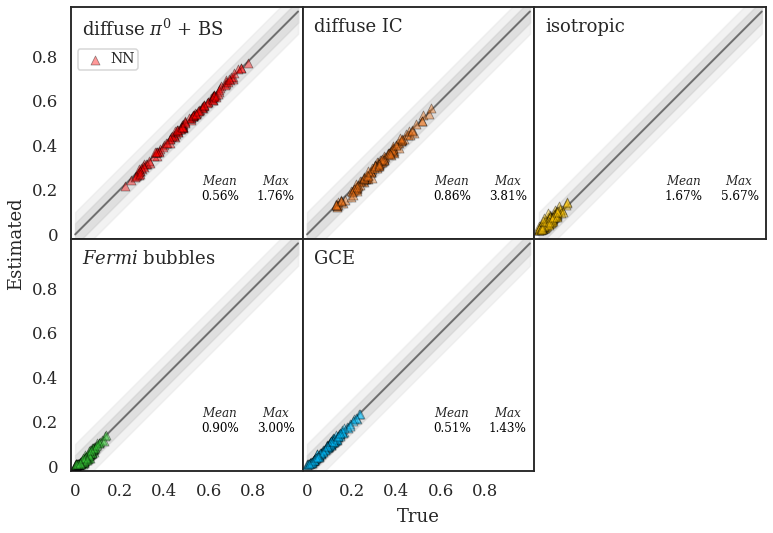

In [18]:
save_figs = False
nn.quick_evaluate(save_figs=save_figs)